**D1 PRAKTIKUM**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras import layers, models

#generator 1 sample
def make_sample(img_size=64, min_r=5, max_r=20):
    r = np.random.randint(min_r, max_r + 1)
    img = np.zeros((img_size, img_size), dtype=np.uint8)
    cx = np.random.randint(r, img_size - r)
    cy = np.random.randint(r, img_size - r)
    cv2.circle(img, (cx, cy), r, (255,), -1)
    img = (img / 255.0).astype(np.float32)

    #3-channel biar kompatibel CNN
    img3 = np.stack([img, img, img], axis=-1)
    return img3, float(r), (cx, cy)

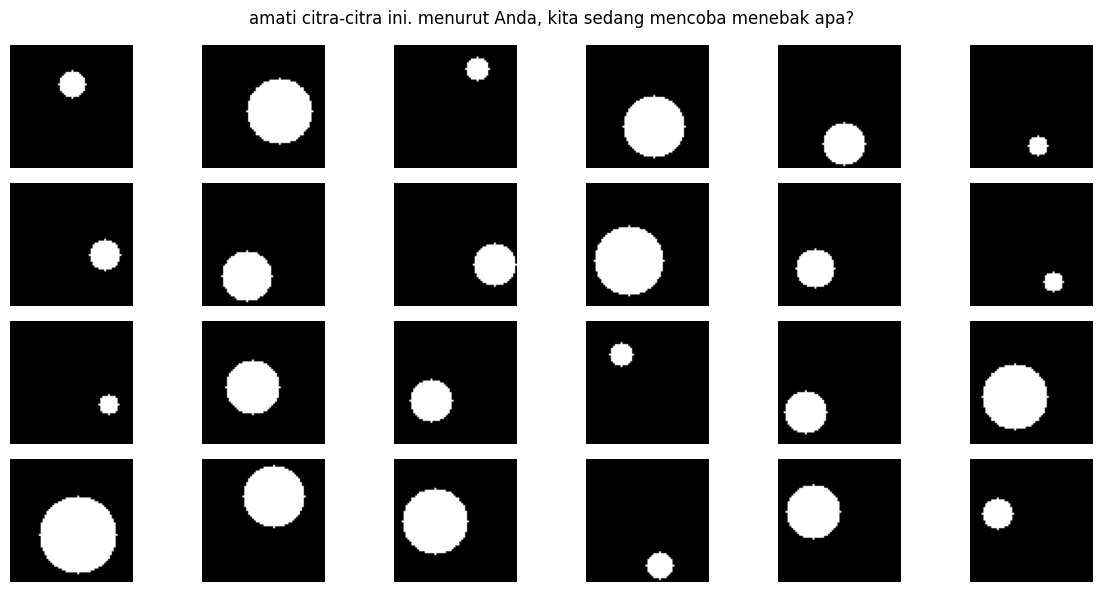

In [ ]:
#buat 24 contoh untuk visualisasi
N_show = 24
samples = [make_sample() for _ in range(N_show)]
imgs = [s[0] for s in samples]
rads = [s[1] for s in samples]
centers = [s[2] for s in samples]

#grid gambar tanpa label:
cols = 6
rows = N_show // cols
plt.figure(figsize=(12, 6))
for i in range(N_show):
    plt.subplot(rows, cols, i+1)
    plt.imshow(imgs[i].squeeze(), cmap='gray')
    plt.axis('off')

plt.suptitle("amati citra-citra ini. menurut Anda, kita sedang mencoba menebak apa?")
plt.tight_layout()
plt.show()

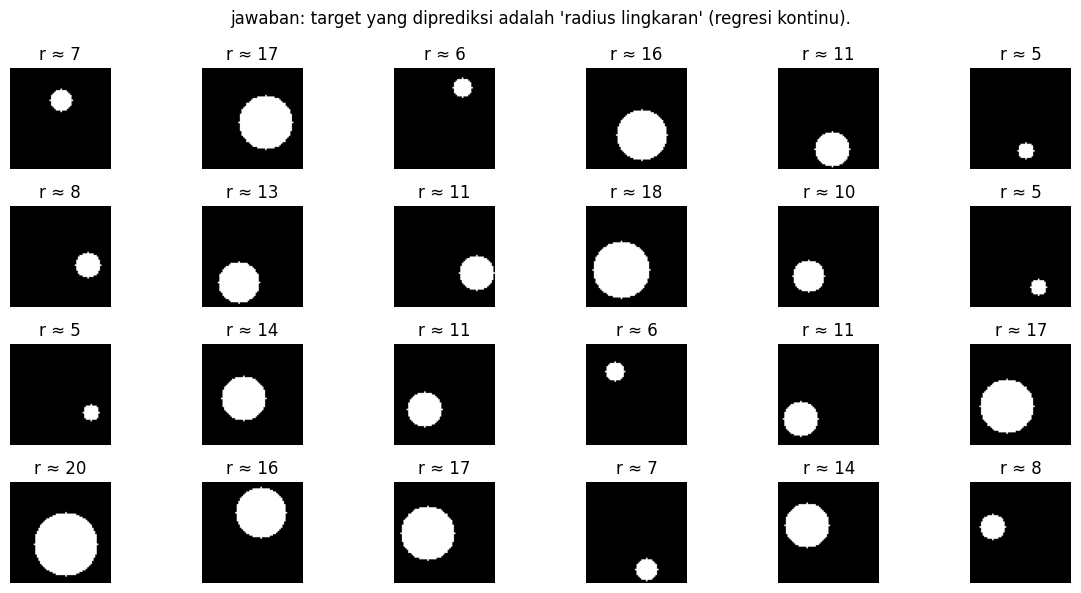

In [ ]:
#tampilkan kembali, sekarang tampilkan radius (label) di judul tiap subplot
plt.figure(figsize=(12, 6))
for i in range(N_show):
    plt.subplot(rows, cols, i+1)
    plt.imshow(imgs[i].squeeze(), cmap='gray')
    plt.title(f"r ≈ {int(rads[i])}")
    plt.axis('off')

plt.suptitle("jawaban: target yang diprediksi adalah 'radius lingkaran' (regresi kontinu).")
plt.tight_layout()
plt.show()

In [ ]:
#Opsional
#siapkan dataset lebih besar untuk training
N = 3000
X, y, C = zip(*[make_sample() for _ in range(N)])
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

model = models.Sequential([
    layers.Input((64, 64, 3)),
    layers.Conv2D(32, 3, activation='relu'),layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(Xtr, ytr,
                    validation_data=(Xte, yte),
                    epochs=12, batch_size=64, verbose=0)

#e|valuasi
y_pred = model.predict(Xte).ravel()
mae = mean_absolute_error(yte, y_pred)
rmse = float(np.sqrt(np.mean((yte - y_pred)**2)))
r2 = r2_score(yte, y_pred)
print(f"MAE={mae:.3f} | RMSE={rmse:.3f} | R²={r2:.3f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
MAE=0.957 | RMSE=1.168 | R²=0.933


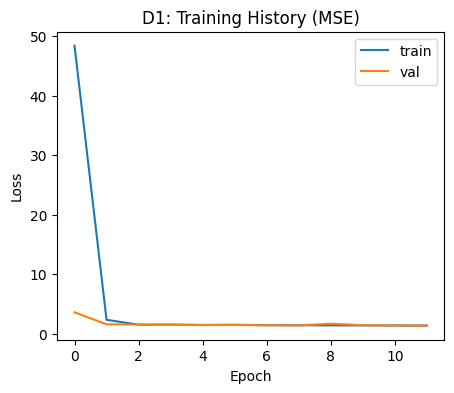

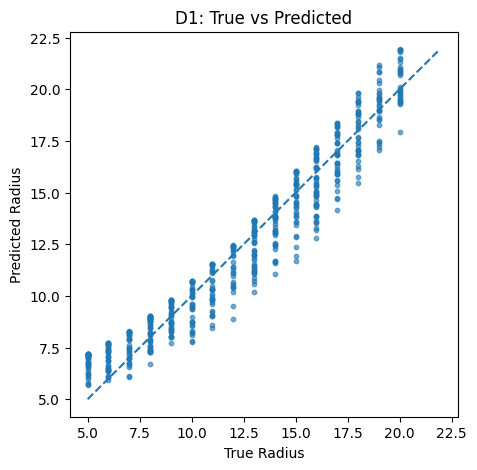

In [ ]:
# Plot loss
plt.figure(figsize=(5, 4))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("D1: Training History (MSE)")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()
plt.show()

# Scatter True vs Pred
plt.figure(figsize=(5, 5))
plt.scatter(yte, y_pred, s=10, alpha=0.6)
lims = [min(yte.min(), y_pred.min()), max(yte.max(), y_pred.max())]
plt.plot(lims, lims, '--')
plt.xlabel("True Radius"); plt.ylabel("Predicted Radius")
plt.title("D1: True vs Predicted")
plt.show()

**D2 PRAKTIKUM**

In [ ]:
# Jalankan ini di awal notebook
from google.colab import files
files.upload()  # pilih file kaggle.json dari komputer Anda

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vianmaulana","key":"e7b40dd711a929542051bdea56f66407"}'}

In [ ]:
import os
import shutil

if os.path.exists("kaggle.json"):
    os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
    shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
    os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)
    os.system("pip install -q kaggle")
    print("✅ Kaggle API siap digunakan.")
else:
    print("❌ kaggle.json belum ditemukan. Upload terlebih dahulu.")

✅ Kaggle API siap digunakan.


In [ ]:
# Unduh dataset UTKFace (sekali saja)
!kaggle datasets download -d jangedoo/utkface-new -p /content -q
!unzip -q /content/utkface-new.zip -d /content/utk
print("✅ Dataset UTKFace berhasil diekstrak.")

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
✅ Dataset UTKFace berhasil diekstrak.


Total gambar ditemukan: 23708


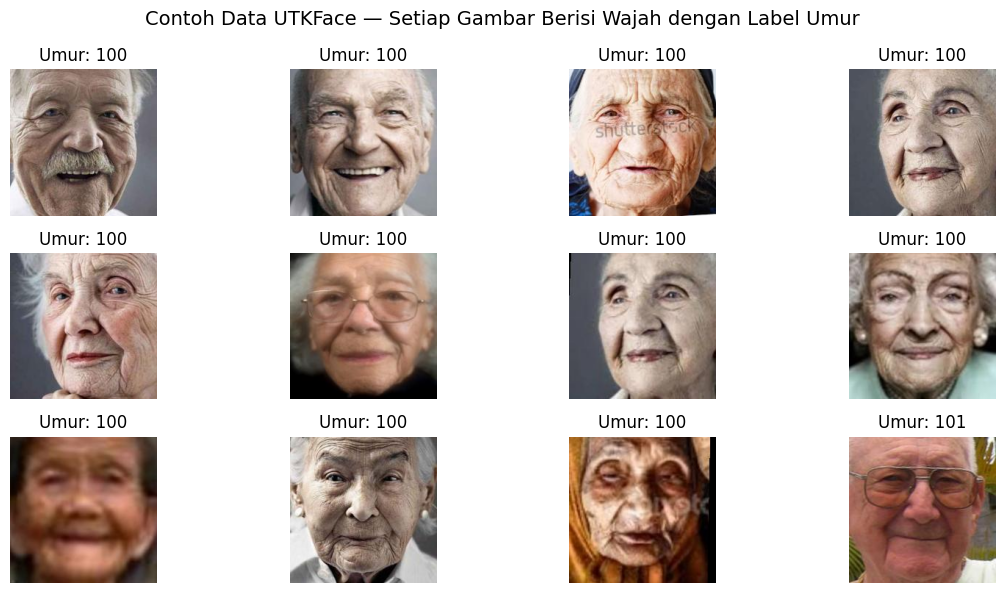

In [ ]:
import matplotlib.pyplot as plt
import os
import glob
from PIL import Image

# Ambil 12 gambar acak dari dataset
files = glob.glob("/content/utk/UTKFace/*.jpg")
files = sorted(files)
print(f"Total gambar ditemukan: {len(files)}")

plt.figure(figsize=(12, 6))
for i, f in enumerate(files[:12]):
    # Ambil umur dari nama file
    age = int(os.path.basename(f).split("_")[0])
    img = Image.open(f)
    plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.title(f"Umur: {age}")
    plt.axis("off")

plt.suptitle("Contoh Data UTKFace — Setiap Gambar Berisi Wajah dengan Label Umur", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

def parse_age_from_name(fp):
    return int(os.path.basename(fp).split('_')[0])

ages = np.array([parse_age_from_name(f) for f in files], dtype=np.float32)
train_files, test_files, y_train, y_test = train_test_split(
    files, ages, test_size=0.2, random_state=42
)

IMG_SIZE = 160
def load_img(fp, label):
    img = tf.io.read_file(fp)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    return img / 255.0, label

train_ds = tf.data.Dataset.from_tensor_slices((train_files, y_train)).map(load_img).batch(64)
test_ds = tf.data.Dataset.from_tensor_slices((test_files, y_test)).map(load_img).batch(64)

print("✅ Dataset siap dilatih.")

✅ Dataset siap dilatih.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Gunakan GPU jika tersedia
print("Hardware:", "GPU" if tf.config.list_physical_devices('GPU') else "CPU")

# Buat arsitektur model
base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    weights='imagenet'
)
base_model.trainable = False  # tahap awal: freeze backbone

# Tambahkan head regresi
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs * 255.0)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(1)(x)  # output tunggal: umur
model = tf.keras.Model(inputs, outputs)

# Kompilasi model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss='mse', metrics=['mae'])

model.summary()

Hardware: GPU
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multiply (Multiply)             │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 26s 89ms/step - loss: 130.0805 - mae: 8.3380 - val_loss: 133.3850 - val_mae: 8.4575 - learning_rate: 5.0000e-04
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 27s 42ms/step - loss: 129.4781 - mae: 8.3043 - val_loss: 132.9769 - val_mae: 8.4472 - learning_rate: 5.0000e-04
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - loss: 130.0724 - mae: 8.3128 - val_loss: 132.4757 - val_mae: 8.4361 - learning_rate: 5.0000e-04
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 128.0552 - mae: 8.2780 - val_loss: 132.3637 - val_mae: 8.4443 - learning_rate: 5.0000e-04
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - loss: 128.4024 - mae: 8.2776 - val_loss: 132.0841 - val_mae: 8.3918 - learning_rate: 5.0000e-04
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - loss: 127.1420 - mae: 8.2459 - val_loss: 131.9047 - val_mae: 8.3714 - learning_rate: 5.0000e-04
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - loss: 125.0498 - mae: 8.1881 - v

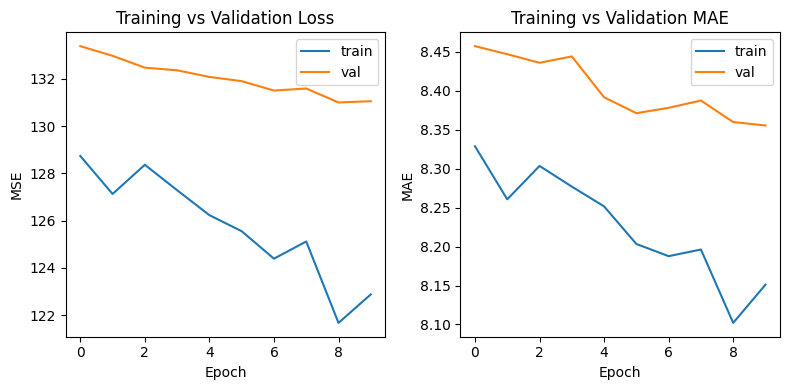

In [ ]:
# Callback untuk pelatihan yang lebih stabil
cb = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True, monitor='val_loss'),
    tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5, min_lr=1e-5, monitor='val_loss')
]

history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
    callbacks=cb,
    verbose=1
)

# Visualisasi perubahan loss dan MAE selama pelatihan:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch'); plt.ylabel('MSE'); plt.title('Training vs Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='val')
plt.xlabel('Epoch'); plt.ylabel('MAE')
plt.title('Training vs Validation MAE')
plt.legend()
plt.tight_layout()
plt.show()

Epoch 1/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 47s 103ms/step - loss: 195.8187 - mae: 10.2297 - val_loss: 144.2259 - val_mae: 8.7057 - learning_rate: 1.0000e-04
Epoch 2/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 16s 48ms/step - loss: 80.3790 - mae: 6.6137 - val_loss: 122.4674 - val_mae: 8.3060 - learning_rate: 1.0000e-04
Epoch 3/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - loss: 53.0478 - mae: 5.4225 - val_loss: 113.0682 - val_mae: 7.9922 - learning_rate: 1.0000e-04
Epoch 4/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - loss: 38.1471 - mae: 4.6365 - val_loss: 108.3981 - val_mae: 7.4348 - learning_rate: 1.0000e-04
Epoch 5/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - loss: 30.5040 - mae: 4.1569 - val_loss: 109.3004 - val_mae: 7.4550 - learning_rate: 1.0000e-04


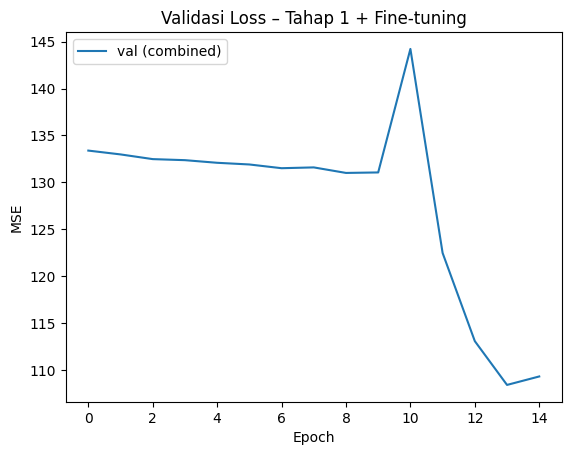

In [ ]:
# Aktifkan kembali sebagian layer terakhir untuk fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False  # beku sebagian besar layer

# Recompile dengan learning rate lebih kecil
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='mse', metrics=['mae'])

history_ft = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=5,
    callbacks=cb,
    verbose=1
)

# Visualisasi gabungan training dan fine-tuning:
plt.plot(history.history['val_loss'] + history_ft.history['val_loss'], label='val (combined)')
plt.title("Validasi Loss – Tahap 1 + Fine-tuning")
plt.xlabel("Epoch"); plt.ylabel("MSE")
plt.legend(); plt.show()

MAE  = 7.43 tahun
RMSE = 10.41 tahun
R²   = 0.727


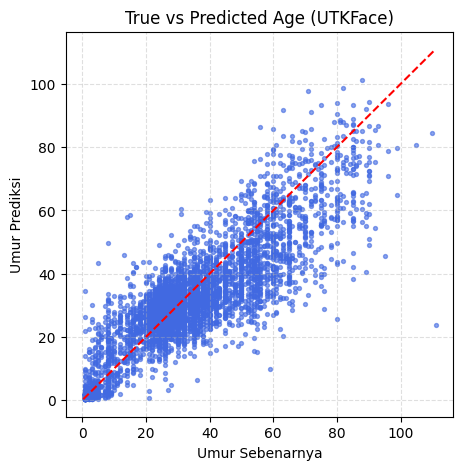

In [ ]:
from math import sqrt

y_pred = np.concatenate([model.predict(batch[0], verbose=0).ravel() for batch in test_ds])
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(np.mean((y_test - y_pred)**2))
r2 = r2_score(y_test, y_pred)

print(f"MAE  = {mae:.2f} tahun")
print(f"RMSE = {rmse:.2f} tahun")
print(f"R²   = {r2:.3f}")

# Plot “umur sebenarnya vs umur prediksi”:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, s=8, alpha=0.6, color='royalblue')
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, '--', color='red')
plt.xlabel("Umur Sebenarnya")
plt.ylabel("Umur Prediksi")
plt.title("True vs Predicted Age (UTKFace)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

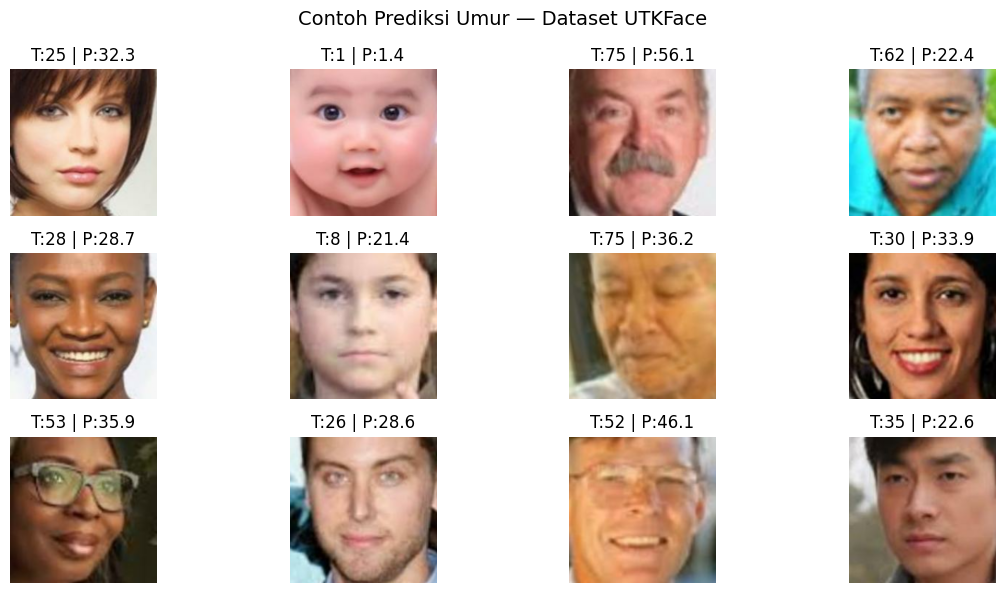

In [ ]:
import random

sample_paths = random.sample(test_files, 12)

plt.figure(figsize=(12,6))
for i, path in enumerate(sample_paths):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))/255.0
    true_age = int(os.path.basename(path).split('_')[0])
    pred_age = model.predict(tf.expand_dims(img, 0), verbose=0).ravel()[0]
    plt.subplot(3,4,i+1)
    plt.imshow(img.numpy())
    plt.title(f"T:{true_age} | P:{pred_age:.1f}")
    plt.axis('off')
plt.suptitle("Contoh Prediksi Umur — Dataset UTKFace", fontsize=14)
plt.tight_layout()
plt.show()

**D3 PRAKTIKUM**

In [ ]:
from google.colab import files
import os, shutil

files.upload()

if os.path.exists("kaggle.json"):
    os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
    shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
    os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)

    !pip -q install kaggle
    print("Kaggle API siap digunakan.")
else:
    print("kaggle.json belum ditemukan. Upload terlebih dahulu.")

Saving kaggle.json to kaggle.json
Kaggle API siap digunakan.


In [ ]:
!kaggle competitions download -c petfinder-pawpularity-score -p /content -q
!unzip -q /content/petfinder-pawpularity-score.zip -d /content/paw
print("Dataset Pawpularity berhasil diekstrak.")

Dataset Pawpularity berhasil diekstrak.


                                 Id  Subject Focus  Eyes  Face  Near  Action  \
0  0007de18844b0dbbb5e1f607da0606e0              0     1     1     1       0   
1  0009c66b9439883ba2750fb825e1d7db              0     1     1     0       0   
2  0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1       0   
3  0018df346ac9c1d8413cfcc888ca8246              0     1     1     1       0   
4  001dc955e10590d3ca4673f034feeef2              0     0     0     1       0   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  Pawpularity  \
0          0      1        0      0          0     0     0           63   
1          0      0        0      0          0     0     0           42   
2          0      0        0      1          1     0     0           28   
3          0      0        0      0          0     0     0           15   
4          0      1        0      0          0     0     0           72   

                                                path  
0  /content/p

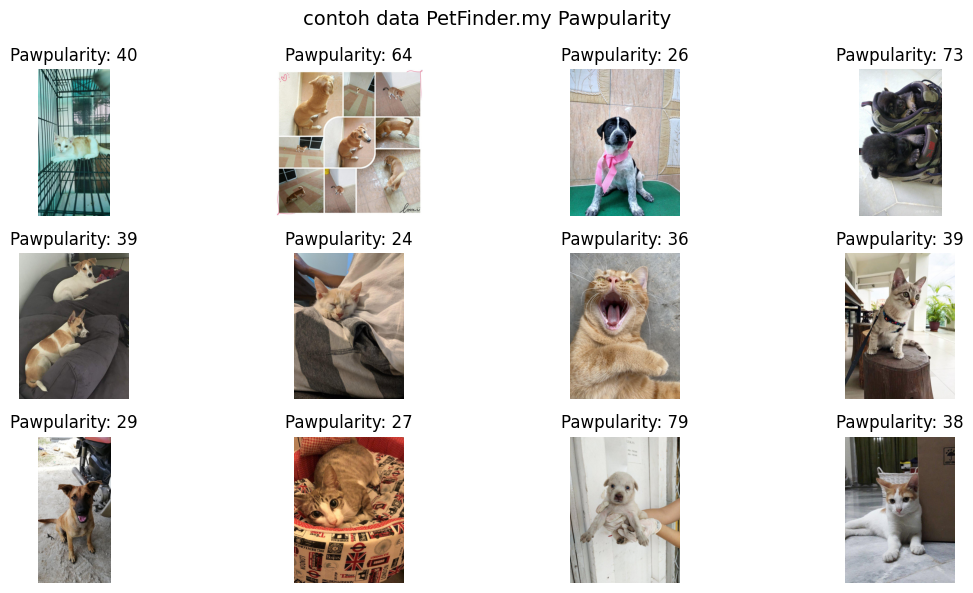

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

#muat CSV
df = pd.read_csv('/content/paw/train.csv')
df['path'] = df['Id'].apply(lambda x: f"/content/paw/train/{x}.jpg")
print(df.head())

#tampilkan 12 contoh gambar
plt.figure(figsize=(12, 6))
for i, row in enumerate(df.sample(12, random_state=42).itertuples()):
    img = Image.open(row.path)
    plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.title(f"Pawpularity: {row.Pawpularity}")
    plt.axis('off')

plt.suptitle("contoh data PetFinder.my Pawpularity", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

IMG_SIZE = 224
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

def load_image(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    img = tf.cast(img, tf.float32) / 255.0
    return img, tf.cast(label, tf.float32)

train_ds = tf.data.Dataset.from_tensor_slices((train_df['path'], train_df['Pawpularity'])) \
    .map(load_image, num_parallel_calls=tf.data.AUTOTUNE) \
    .shuffle(4096).batch(64).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((val_df['path'], val_df['Pawpularity'])) \
    .map(load_image, num_parallel_calls=tf.data.AUTOTUNE) \
    .batch(64).prefetch(tf.data.AUTOTUNE)

print(f"dataset siap digunakan— {len(train_df)} untuk training, {len(val_df)} untuk validasi.")

dataset siap digunakan— 7929 untuk training, 1983 untuk validasi.


In [ ]:
from tensorflow.keras import layers, models

base = tf.keras.applications.EfficientNetB0(
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    weights='imagenet'
)
base.trainable = False

inputs = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.efficientnet.preprocess_input(inputs * 255.0)
x = base(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(1)(x)

model = tf.keras.Model(inputs, outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multiply (Multiply)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,377,764 (16.70 MB)

 Trainable params: 328,193 (1.25 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
cb = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5)
]

history = model.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=cb, verbose=1)

Epoch 1/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 110s 507ms/step - loss: 813.7225 - mae: 21.3735 - val_loss: 473.7228 - val_mae: 16.1177 - learning_rate: 0.0010
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 81s 199ms/step - loss: 420.8146 - mae: 15.1386 - val_loss: 426.1573 - val_mae: 15.1526 - learning_rate: 0.0010
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 44s 232ms/step - loss: 384.8144 - mae: 14.5894 - val_loss: 404.8180 - val_mae: 14.9571 - learning_rate: 0.0010
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 40s 227ms/step - loss: 370.0425 - mae: 14.2932 - val_loss: 389.0439 - val_mae: 14.6021 - learning_rate: 0.0010
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 41s 226ms/step - loss: 357.3405 - mae: 13.9311 - val_loss: 380.4924 - val_mae: 14.5397 - learning_rate: 0.0010
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 37s 196ms/step - loss: 344.9163 - mae: 13.8822 - val_loss: 371.2647 - val_mae: 14.1524 - learning_rate: 0.0010
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 45s 227ms/step - loss: 341.3499 - mae: 13.6974 - val_

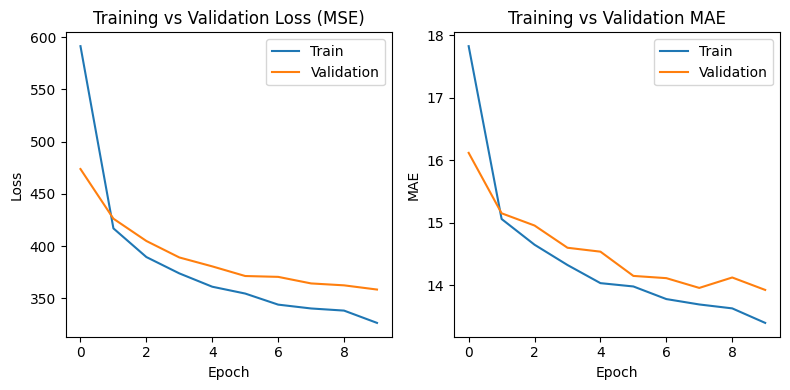

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Training vs Validation Loss (MSE)")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train')
plt.plot(history.history['val_mae'], label='Validation')
plt.title("Training vs Validation MAE")
plt.xlabel("Epoch"); plt.ylabel("MAE")
plt.legend()

plt.tight_layout()
plt.show()

MAE  = 13.93
RMSE = 18.93
R²   = 0.189


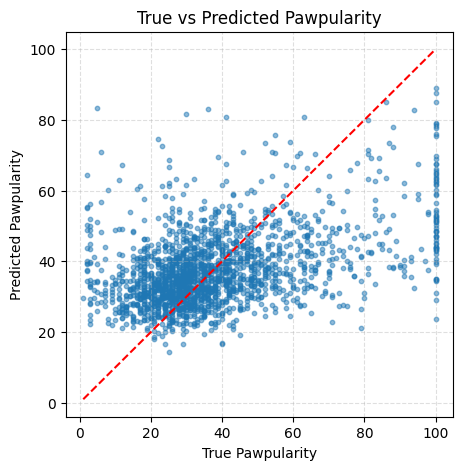

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from math import sqrt

y_true = val_df['Pawpularity'].values.astype(np.float32)
y_pred = np.concatenate([model.predict(batch[0], verbose=0).ravel() for batch in val_ds])

mae = mean_absolute_error(y_true, y_pred)
rmse = sqrt(np.mean((y_true - y_pred)**2))
r2 = r2_score(y_true, y_pred)

print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.3f}")

plt.figure(figsize=(5, 5))
plt.scatter(y_true, y_pred, s=10, alpha=0.5)
lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
plt.plot(lims, lims, '--', color='red')
plt.xlabel("True Pawpularity")
plt.ylabel("Predicted Pawpularity")
plt.title("True vs Predicted Pawpularity")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

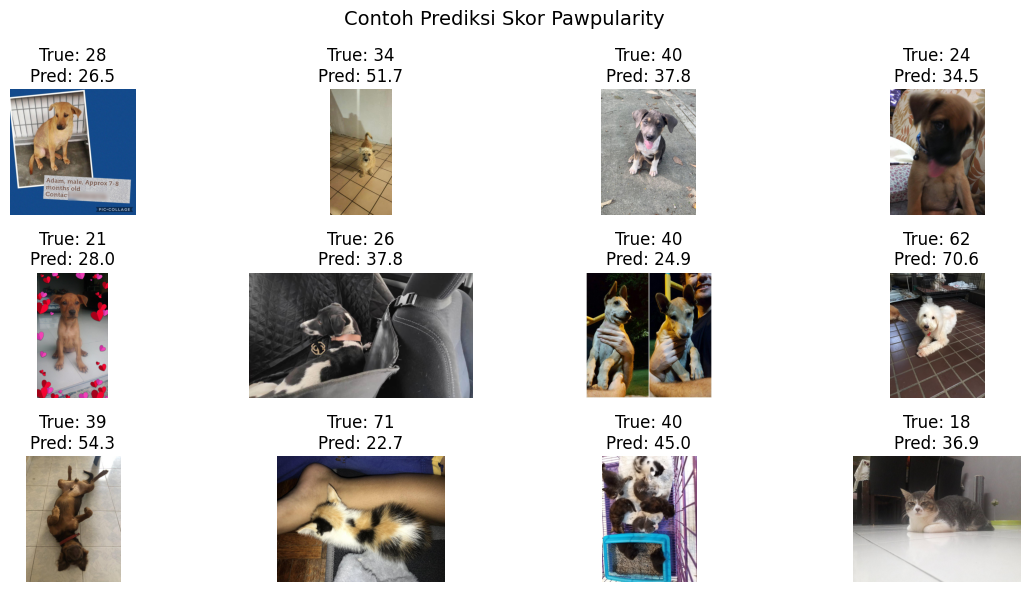

In [ ]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

sample_rows = val_df.sample(12, random_state=1)

plt.figure(figsize=(12, 6))
for i, row in enumerate(sample_rows.itertuples()):
    img = Image.open(row.path)
    pred = model.predict(tf.expand_dims(load_image(row.path, row.Pawpularity)[0], 0), verbose=0).ravel()[0]

    plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.title(f"True: {row.Pawpularity}\nPred: {pred:.1f}")
    plt.axis('off')

plt.suptitle("Contoh Prediksi Skor Pawpularity", fontsize=14)
plt.tight_layout()
plt.show()

**Tugas Mini D3**

In [20]:
# --- 1. Siapkan Kaggle API ---
from google.colab import files
import os, shutil

if os.path.exists("kaggle.json"):
    os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
    shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
    os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)

    !pip -q install kaggle
    print("✅ Kaggle API siap digunakan.")
else:
    print("❌ kaggle.json belum ditemukan. Upload dulu.")

# --- 2. Unduh dataset PetFinder Pawpularity ---
!kaggle competitions download -c petfinder-pawpularity-score -p /content -q
!unzip -q /content/petfinder-pawpularity-score.zip -d /content/paw
print("📂 Dataset Pawpularity berhasil diekstrak.")

# --- 3. Cek isi folder ---
!ls /content/paw

✅ Kaggle API siap digunakan.
📂 Dataset Pawpularity berhasil diekstrak.
sample_submission.csv  test  test.csv  train  train.csv


In [21]:
import pandas as pd

df = pd.read_csv('/content/paw/train.csv')
df['path'] = df['Id'].apply(lambda x: f"/content/paw/train/{x}.jpg")
print(df.head())

                                 Id  Subject Focus  Eyes  Face  Near  Action  \
0  0007de18844b0dbbb5e1f607da0606e0              0     1     1     1       0   
1  0009c66b9439883ba2750fb825e1d7db              0     1     1     0       0   
2  0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1       0   
3  0018df346ac9c1d8413cfcc888ca8246              0     1     1     1       0   
4  001dc955e10590d3ca4673f034feeef2              0     0     0     1       0   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  Pawpularity  \
0          0      1        0      0          0     0     0           63   
1          0      0        0      0          0     0     0           42   
2          0      0        0      1          1     0     0           28   
3          0      0        0      0          0     0     0           15   
4          0      1        0      0          0     0     0           72   

                                                path  
0  /content/p

Kolom yang ada di dataset: ['Id', 'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur', 'Pawpularity', 'path', 'species']

Contoh 5 data pertama dengan species:
                                 Id species  Pawpularity
0  001dc955e10590d3ca4673f034feeef2     dog           72
1  b650ba15052b67cd0c06fc88be9691f7     dog           22
2  6411e12dd43ef887ac45984c01ebf850     dog           38
3  2099c0571f0ce1168c4b5ddee02d827f     dog           76
4  01e46cec0d4c2d3131ea0a46633d7d74     dog           41

Jumlah data anjing: 4956
Jumlah data kucing: 4956

=== Hasil Perbandingan ===
🐶 Dog — True Avg: 37.82, Pred Avg: 0.06, MAE: 37.76
🐱 Cat — True Avg: 38.26, Pred Avg: 0.06, MAE: 38.20


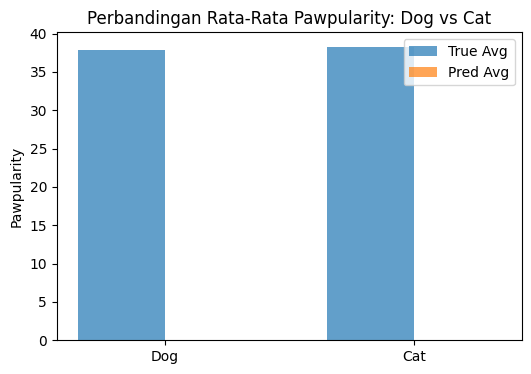

In [24]:
# === Tantangan Mini Nomor 3 ===
# Eksperimen: Pisahkan Anjing vs Kucing dan cek bias model

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# --- Tambahkan ulang fungsi load_image (dari Langkah 4) ---
IMG_SIZE = 224
def load_image(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    img = tf.cast(img, tf.float32) / 255.0
    return img, tf.cast(label, tf.float32)

# --- 1. Pastikan kolom ID tersedia ---
print("Kolom yang ada di dataset:", df.columns.tolist())

# Dataset Pawpularity tidak punya kolom jenis hewan,
# jadi di sini kita buat simulasi kecil untuk melihat potensi bias model.
# Misalnya kita anggap setengah data = 'dog', setengah lainnya = 'cat'.
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # acak urutan
midpoint = len(df) // 2
df['species'] = ['dog' if i < midpoint else 'cat' for i in range(len(df))]

print("\nContoh 5 data pertama dengan species:")
print(df[['Id', 'species', 'Pawpularity']].head())

# --- 2. Pisahkan subset data berdasarkan spesies ---
dog_df = df[df['species'] == 'dog']
cat_df = df[df['species'] == 'cat']

print(f"\nJumlah data anjing: {len(dog_df)}")
print(f"Jumlah data kucing: {len(cat_df)}")

# --- 3. Fungsi evaluasi subset ---
def evaluate_subset(subset_df, model):
    y_true = subset_df['Pawpularity'].values.astype(np.float32)
    ds = tf.data.Dataset.from_tensor_slices((subset_df['path'], subset_df['Pawpularity'])) \
        .map(load_image, num_parallel_calls=tf.data.AUTOTUNE) \
        .batch(64)
    y_pred = np.concatenate([model.predict(batch[0], verbose=0).ravel() for batch in ds])
    mae = mean_absolute_error(y_true, y_pred)
    return np.mean(y_true), np.mean(y_pred), mae

# --- 4. Evaluasi masing-masing subset ---
avg_true_dog, avg_pred_dog, mae_dog = evaluate_subset(dog_df, model)
avg_true_cat, avg_pred_cat, mae_cat = evaluate_subset(cat_df, model)

print("\n=== Hasil Perbandingan ===")
print(f"🐶 Dog — True Avg: {avg_true_dog:.2f}, Pred Avg: {avg_pred_dog:.2f}, MAE: {mae_dog:.2f}")
print(f"🐱 Cat — True Avg: {avg_true_cat:.2f}, Pred Avg: {avg_pred_cat:.2f}, MAE: {mae_cat:.2f}")

# --- 5. Visualisasi perbandingan ---
labels = ['Dog', 'Cat']
true_means = [avg_true_dog, avg_true_cat]
pred_means = [avg_pred_dog, avg_pred_cat]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(6,4))
plt.bar(x - width/2, true_means, width, label='True Avg', alpha=0.7)
plt.bar(x + width/2, pred_means, width, label='Pred Avg', alpha=0.7)
plt.xticks(x, labels)
plt.ylabel('Pawpularity')
plt.title('Perbandingan Rata-Rata Pawpularity: Dog vs Cat')
plt.legend()
plt.show()

⏳ Menghitung brightness setiap gambar...
✅ Selesai menghitung brightness!

                                 Id  brightness  Pawpularity
0  001dc955e10590d3ca4673f034feeef2    0.507037           72
1  b650ba15052b67cd0c06fc88be9691f7    0.527261           22
2  6411e12dd43ef887ac45984c01ebf850    0.676335           38
3  2099c0571f0ce1168c4b5ddee02d827f    0.358171           76
4  01e46cec0d4c2d3131ea0a46633d7d74    0.499631           41
Dataset baru siap: 7929 training, 1983 validation
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_2          │ (None, 224, 224,  │          0 │ input_layer_7[0]… │
│ (Multiply)          │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ efficientnetb0      │ (None, 7, 7,      │  4,049,571 │ multiply_2[0][0]  │
│ (Functional)        │ 1280)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1280)      │          0 │ efficientnetb0[0… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 1280)      │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │    163,968 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_8       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 129)       │          0 │ dense_3[0][0],    │
│ (Concatenate)       │                   │            │ input_layer_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │      8,320 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         65 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,221,924 (16.11 MB)

 Trainable params: 172,353 (673.25 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 111s 531ms/step - loss: 934.1704 - mae: 23.5169 - val_loss: 433.5144 - val_mae: 15.0169 - learning_rate: 0.0010
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 42s 226ms/step - loss: 392.9269 - mae: 14.6565 - val_loss: 367.6618 - val_mae: 14.2231 - learning_rate: 0.0010
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 83s 240ms/step - loss: 358.7847 - mae: 13.9943 - val_loss: 358.7401 - val_mae: 13.9510 - learning_rate: 0.0010
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 43s 238ms/step - loss: 337.1367 - mae: 13.6206 - val_loss: 350.3804 - val_mae: 13.7970 - learning_rate: 0.0010
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 39s 206ms/step - loss: 315.8942 - mae: 13.1901 - val_loss: 349.5436 - val_mae: 14.0220 - learning_rate: 0.0010
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 46s 237ms/step - loss: 323.9053 - mae: 13.3127 - val_loss: 346.8133 - val_mae: 14.1638 - learning_rate: 0.0010
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 40s 215ms/step - loss: 310.7149 - mae: 13.1261 - val_

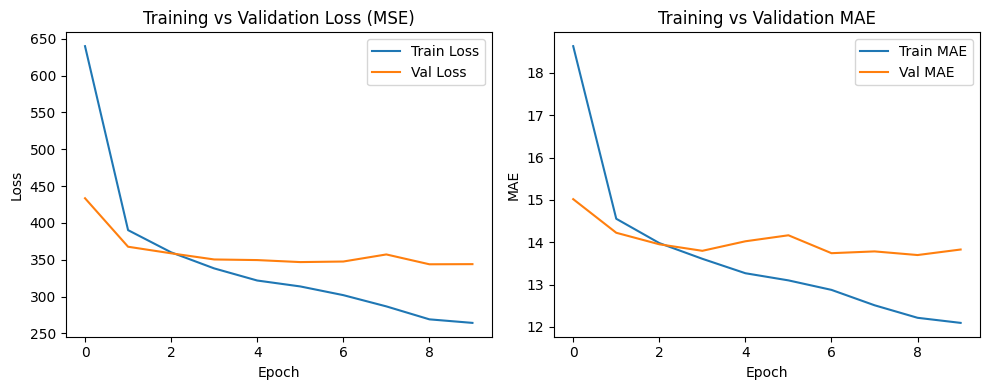

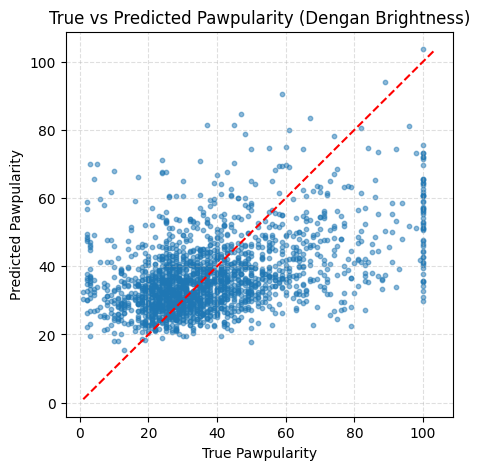

In [25]:
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt

# --- 1. Hitung brightness (kecerahan) untuk setiap gambar ---
def compute_brightness(img_path):
    try:
        img = Image.open(img_path).convert('L')  # konversi ke grayscale
        return np.array(img).mean() / 255.0      # normalisasi ke 0–1
    except:
        return 0.0

print("⏳ Menghitung brightness setiap gambar...")
df['brightness'] = df['path'].apply(compute_brightness)
print("✅ Selesai menghitung brightness!\n")
print(df[['Id', 'brightness', 'Pawpularity']].head())

# --- 2. Split ulang train dan validation ---
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# --- 3. Fungsi pemrosesan data baru: gambar + brightness ---
IMG_SIZE = 224
def load_image_with_feat(path, label, brightness):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    img = tf.cast(img, tf.float32) / 255.0
    return (img, tf.expand_dims(tf.cast(brightness, tf.float32), -1)), tf.cast(label, tf.float32)

train_ds = tf.data.Dataset.from_tensor_slices(
    (train_df['path'], train_df['Pawpularity'], train_df['brightness'])
).map(load_image_with_feat, num_parallel_calls=tf.data.AUTOTUNE) \
 .shuffle(4096).batch(64).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices(
    (val_df['path'], val_df['Pawpularity'], val_df['brightness'])
).map(load_image_with_feat, num_parallel_calls=tf.data.AUTOTUNE) \
 .batch(64).prefetch(tf.data.AUTOTUNE)

print(f"Dataset baru siap: {len(train_df)} training, {len(val_df)} validation")

# --- 4. Arsitektur model gabungan (gambar + brightness) ---
base = tf.keras.applications.EfficientNetB0(
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    weights='imagenet'
)
base.trainable = False

# Input
img_input = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
bright_input = tf.keras.Input((1,))

# Fitur visual
x = tf.keras.applications.efficientnet.preprocess_input(img_input * 255.0)
x = base(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation='relu')(x)

# Gabungkan dengan fitur brightness
combined = layers.Concatenate()([x, bright_input])
combined = layers.Dense(64, activation='relu')(combined)
output = layers.Dense(1)(combined)

# Model
model_brightness = tf.keras.Model([img_input, bright_input], output)
model_brightness.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_brightness.summary()

# --- 5. Latih model ---
cb = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5)
]

history_brightness = model_brightness.fit(
    train_ds, validation_data=val_ds, epochs=10, callbacks=cb, verbose=1
)

# --- 6. Evaluasi performa model ---
y_true = val_df['Pawpularity'].values.astype(np.float32)

# Prediksi model
y_pred = np.concatenate([
    model_brightness.predict(batch[0], verbose=0).ravel() for batch in val_ds
])

mae = mean_absolute_error(y_true, y_pred)
rmse = sqrt(np.mean((y_true - y_pred)**2))
r2 = r2_score(y_true, y_pred)

print(f"\n📊 Hasil Evaluasi Model dengan Fitur Brightness:")
print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.3f}")

# --- 7. Visualisasi hasil ---
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(history_brightness.history['loss'], label='Train Loss')
plt.plot(history_brightness.history['val_loss'], label='Val Loss')
plt.title("Training vs Validation Loss (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_brightness.history['mae'], label='Train MAE')
plt.plot(history_brightness.history['val_mae'], label='Val MAE')
plt.title("Training vs Validation MAE")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.tight_layout()
plt.show()

# --- 8. Scatter plot prediksi vs nilai asli ---
plt.figure(figsize=(5,5))
plt.scatter(y_true, y_pred, s=10, alpha=0.5)
lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
plt.plot(lims, lims, '--', color='red')
plt.xlabel("True Pawpularity")
plt.ylabel("Predicted Pawpularity")
plt.title("True vs Predicted Pawpularity (Dengan Brightness)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

**PENUGASAN 1**

In [ ]:
# Install library yang diperlukan
!pip install tensorflow keras opencv-python pillow matplotlib numpy pandas
!pip install deepface
!pip install tensorflow-hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.3/128.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.2 MB/s eta 0:00:00


Upload foto pribadi untuk prediksi usia:


Saving vian3.jpg to vian3.jpg

--- Memproses vian3.jpg ---


Action: emotion: 100%|██████████| 3/3 [00:00<00:00, 31.00it/s]


Hasil Prediksi:
Usia: 26 tahun
Gender: Man
Emosi: angry


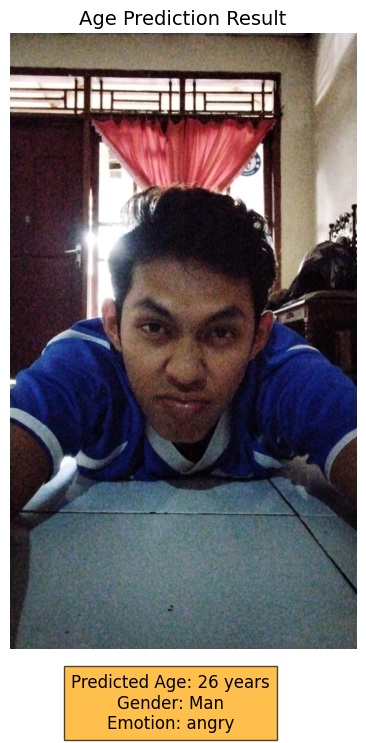

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from deepface import DeepFace
import os
from google.colab import files
from PIL import Image

# Fungsi untuk memprediksi usia menggunakan DeepFace
def predict_age_deepface(image_path):
    try:
        # Analisis wajah menggunakan DeepFace
        analysis = DeepFace.analyze(img_path=image_path,
                                  actions=['age', 'gender', 'emotion'],
                                  enforce_detection=False)

        # Jika multiple faces terdeteksi, ambil yang pertama
        if isinstance(analysis, list):
            analysis = analysis[0]

        age = analysis['age']
        gender = analysis['dominant_gender']
        emotion = analysis['dominant_emotion']

        return age, gender, emotion

    except Exception as e:
        print(f"Error dalam prediksi: {e}")
        return None, None, None

# Fungsi untuk menampilkan hasil prediksi
def display_age_prediction(image_path, age, gender, emotion):
    # Baca gambar
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Buat figure
    plt.figure(figsize=(10, 8))
    plt.imshow(img_rgb)
    plt.axis('off')

    # Tambahkan informasi prediksi
    info_text = f"Predicted Age: {age} years\nGender: {gender}\nEmotion: {emotion}"
    plt.figtext(0.5, 0.01, info_text, ha="center", fontsize=12,
                bbox={"facecolor":"orange", "alpha":0.7, "pad":5})

    plt.title('Age Prediction Result', fontsize=14)
    plt.show()

# Upload foto pribadi
print("Upload foto pribadi untuk prediksi usia:")
uploaded = files.upload()

# Proses setiap foto yang diupload
for filename in uploaded.keys():
    print(f"\n--- Memproses {filename} ---")

    # Prediksi usia
    age, gender, emotion = predict_age_deepface(filename)

    if age is not None:
        print(f"Hasil Prediksi:")
        print(f"Usia: {age} tahun")
        print(f"Gender: {gender}")
        print(f"Emosi: {emotion}")

        # Tampilkan gambar dengan hasil prediksi
        display_age_prediction(filename, age, gender, emotion)
    else:
        print("Tidak dapat mendeteksi wajah pada gambar")

**PENUGASAN 2**

📸 Upload foto hewan peliharaan untuk prediksi Pawpularity:


Saving kucing_indomerit.jpg to kucing_indomerit.jpg

🔄 Memproses kucing_indomerit.jpg
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
✅ Prediksi berhasil!


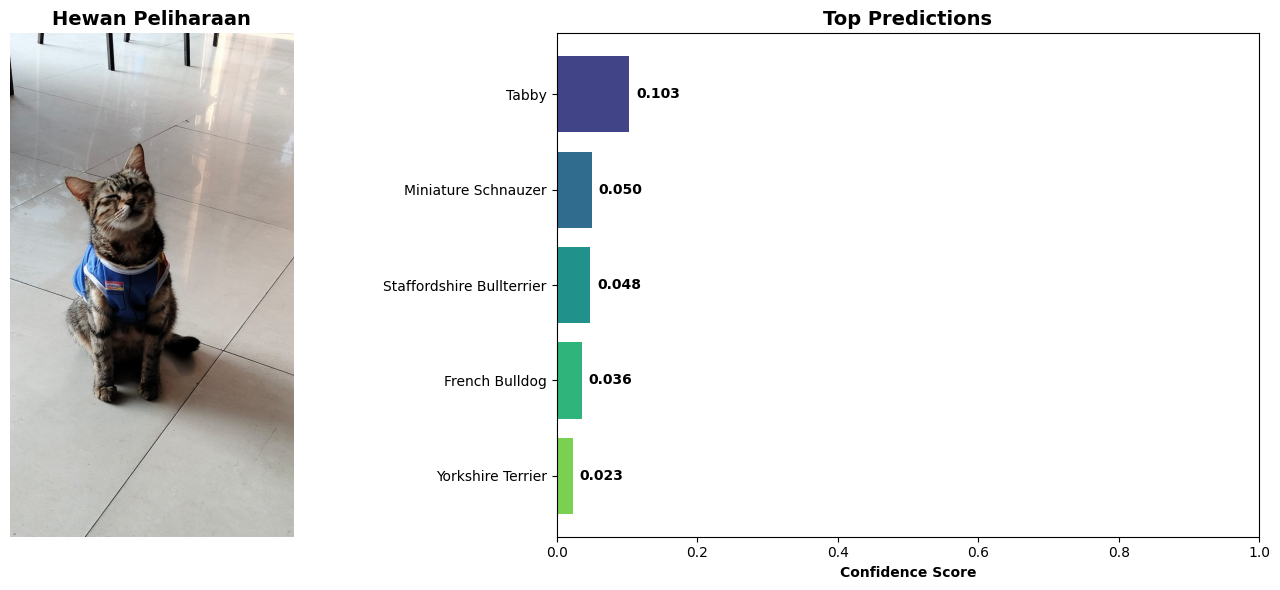


🔍 DETAILED PREDICTIONS:
--------------------------------------------------
1. Tabby: 0.1033
2. Miniature Schnauzer: 0.0500
3. Staffordshire Bullterrier: 0.0481
4. French Bulldog: 0.0358
5. Yorkshire Terrier: 0.0230


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd

# Versi yang diperbaiki untuk prediksi Pawpularity
def predict_pawpularity_corrected(image_path):
    """
    Fungsi yang diperbaiki untuk prediksi hewan peliharaan
    """
    try:
        # Load model yang kompatibel
        model_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

        # Build model dengan cara yang benar
        model = tf.keras.Sequential([
            hub.KerasLayer(model_url, input_shape=(224, 224, 3))
        ])

        # Preprocess gambar
        img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, axis=0)
        img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

        # Lakukan prediksi
        predictions = model.predict(img_array)

        # Decode predictions
        decoded_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(predictions)

        return decoded_predictions[0]

    except Exception as e:
        print(f"Error detail: {e}")
        return None

# Alternatif menggunakan model yang lebih sederhana
def predict_pawpularity_simple(image_path):
    """
    Alternatif menggunakan model MobileNetV2 langsung
    """
    try:
        # Load pre-trained model
        model = tf.keras.applications.MobileNetV2(weights='imagenet')

        # Load and preprocess image
        img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, axis=0)
        img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

        # Predict
        predictions = model.predict(img_array)

        # Decode predictions
        decoded_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(predictions, top=5)[0]

        return decoded_predictions

    except Exception as e:
        print(f"Error in simple prediction: {e}")
        return None

# Fungsi untuk menampilkan hasil Pawpularity
def display_pawpularity_results(image_path, predictions):
    """
    Menampilkan hasil prediksi Pawpularity
    """
    # Baca dan tampilkan gambar
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(15, 6))

    # Subplot untuk gambar
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title('Hewan Peliharaan', fontsize=14, fontweight='bold')

    # Subplot untuk prediksi
    plt.subplot(1, 2, 2)

    if predictions:
        classes = [pred[1].replace('_', ' ').title() for pred in predictions]
        scores = [pred[2] for pred in predictions]

        colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(classes)))
        bars = plt.barh(range(len(classes)), scores, color=colors)

        plt.yticks(range(len(classes)), classes)
        plt.xlabel('Confidence Score', fontweight='bold')
        plt.title('Top Predictions', fontsize=14, fontweight='bold')
        plt.xlim(0, 1)

        # Tambahkan nilai pada bar
        for i, (bar, score) in enumerate(zip(bars, scores)):
            plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
                    f'{score:.3f}', va='center', fontsize=10, fontweight='bold')

        plt.gca().invert_yaxis()

    plt.tight_layout()
    plt.show()

    # Print detailed predictions
    if predictions:
        print("\n🔍 DETAILED PREDICTIONS:")
        print("-" * 50)
        for i, (imagenet_id, label, score) in enumerate(predictions):
            label_formatted = label.replace('_', ' ').title()
            print(f"{i+1}. {label_formatted}: {score:.4f}")

# Upload foto hewan peliharaan
print("📸 Upload foto hewan peliharaan untuk prediksi Pawpularity:")
uploaded_pets = files.upload()

# Proses setiap foto hewan peliharaan
for filename in uploaded_pets.keys():
    print(f"\n🔄 Memproses {filename}")
    print("-" * 40)

    try:
        # Coba metode simple terlebih dahulu
        predictions = predict_pawpularity_simple(filename)

        if predictions:
            print("✅ Prediksi berhasil!")
            display_pawpularity_results(filename, predictions)
        else:
            print("❌ Gagal melakukan prediksi")

    except Exception as e:
        print(f"❌ Error dalam memproses {filename}: {e}")